Machine Learning Homework1 Problem 3

Question(a)

AxesSubplot(0.125,0.125;0.775x0.755)


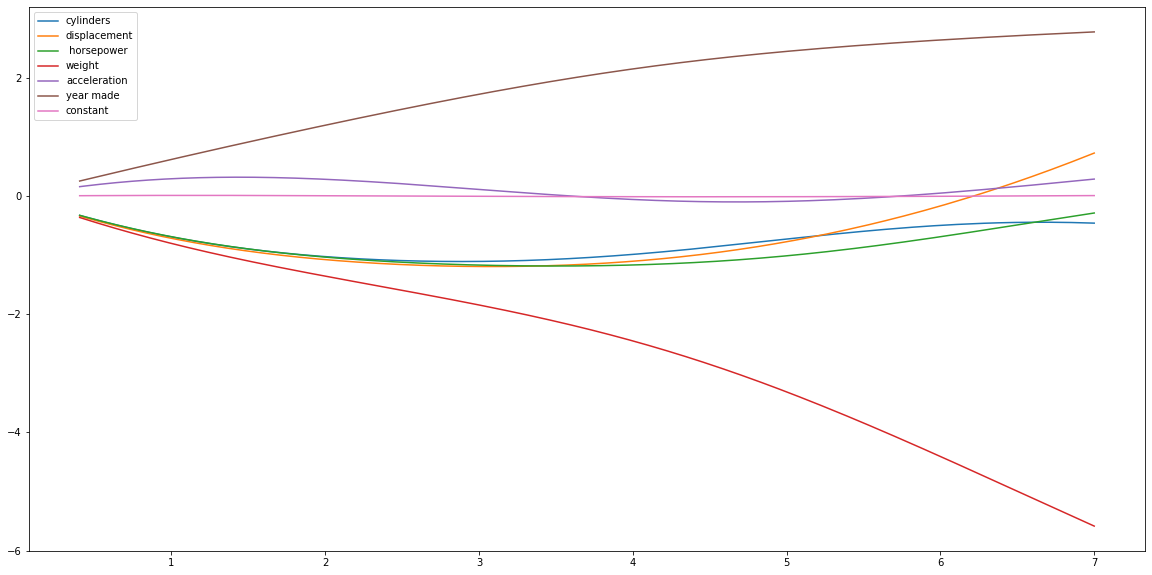

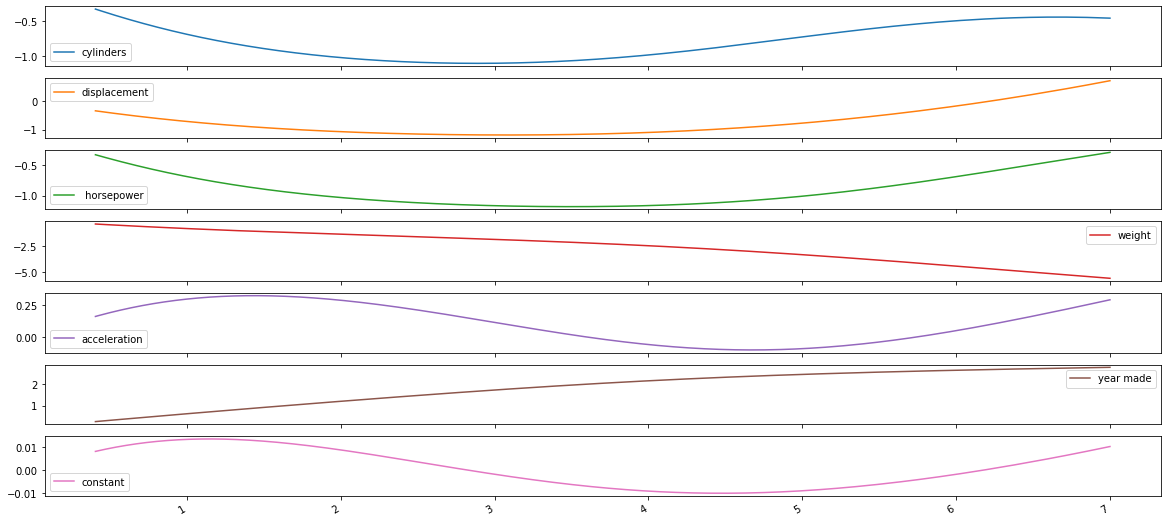

In [2]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import pandas as pd
import os
from numpy.linalg import inv
X_train = np.matrix(pd.read_csv('X_train.csv',header=None))
y_train = np.matrix(pd.read_csv('y_train.csv',header=None))
U,sigma,VT = np.linalg.svd(X_train)
w_rr = []
df = []
for i in range(0,5001):
    w_rr.append(np.squeeze(np.asarray(inv(i*np.identity(7)+X_train.transpose().dot(X_train)).dot(X_train.transpose()).dot(y_train))))
    df.append(np.sum(np.square(sigma)/(np.square(sigma)+i)))
names = ['cylinders','displacement',' horsepower','weight','acceleration','year made','constant']
w_rr = pd.DataFrame(np.matrix(w_rr), columns=names, index = df)
lines = w_rr.plot.line(figsize=(20, 10))
lines_2 = w_rr.plot.line(subplots = True,figsize=(20, 10))

print(lines)
print(lines_2)

Question (b)
Variable 'weight' and 'year made' stand out over others in this case. This means that 'weight' and 'year made' are two features with higher absolute value of 'w' without penalty added which indicates that they influence 'y' the most in ML model (lambda = 0). With penalty added, they are the variables that are influenced the most by the value of lambda. When lambda is higher, the absolute value of 'w' of these two variables are 'shrinked' the most over other variables.

Question (c)

Text(0, 0.5, 'RMSE')

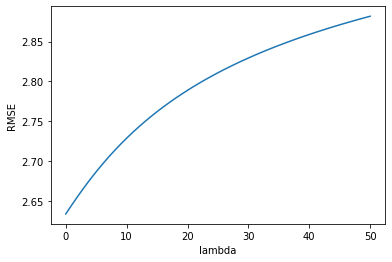

In [3]:
w_test = np.matrix(w_rr.head(51))
X_test = np.matrix(pd.read_csv('X_test.csv',header=None))
y_test = np.matrix(pd.read_csv('y_test.csv',header=None))
y_hat = X_test.dot(w_test.transpose())
lamb = range(0,51)
RMSE = np.sqrt(((np.square(np.subtract(y_hat,y_test)).transpose()).sum(axis=1))/42)
plt.plot(lamb, RMSE)
plt.xlabel('lambda')
plt.ylabel('RMSE')
# The ideal lambda for this question is 0 (meaning LS is the better than Ridge Regression in this case) 
# as the RMSE is the lowest when lambda is 0.

Part 2 (d)

P = 1

In [4]:
w_test_1 = np.matrix(w_rr.head(101))
y_hat_1 = X_test.dot(w_test_1.transpose())
lamb_p = range(0,101)
RMSE_1 = np.sqrt(((np.square(np.subtract(y_hat_1,y_test)).transpose()).sum(axis=1))/42)

P = 2

In [5]:
w_rr_2 = []
mean_2 = np.square(X_train[:,0:6]).mean(0)
sd_2 = np.square(X_train[:,0:6]).std(0)
st_X_train_2 = (np.square(X_train[:,0:6])-mean_2)/sd_2
X_train_2 = np.concatenate((X_train.transpose(), st_X_train_2.transpose())).transpose()

In [6]:
for i in range(0,101):
    w_rr_2.append(np.squeeze(np.asarray(inv(i*np.identity(13)+X_train_2.transpose().dot(X_train_2)).dot(X_train_2.transpose()).dot(y_train))))
w_rr_2 = np.matrix(w_rr_2)
st_X_test_2 = (np.square(X_test[:,0:6])-mean_2)/sd_2
X_test_2 = np.concatenate((X_test.transpose(), st_X_test_2.transpose())).transpose()
y_hat_2 = X_test_2.dot(w_rr_2.transpose())
RMSE_2 = np.sqrt(((np.square(np.subtract(y_hat_2,y_test)).transpose()).sum(axis=1))/42)

P=3

In [7]:
w_rr_3 = []
mean_3 = np.power(X_train[:,0:6],3).mean(0)
sd_3 = np.power(X_train[:,0:6],3).std(0)
st_X_train_3 = (np.power(X_train[:,0:6],3)-mean_3)/sd_3
X_train_3 = np.concatenate((X_train_2.transpose(), st_X_train_3.transpose())).transpose()

In [8]:
for i in range(0,101):
    w_rr_3.append(np.squeeze(np.asarray(inv(i*np.identity(19)+X_train_3.transpose().dot(X_train_3)).dot(X_train_3.transpose()).dot(y_train))))
w_rr_3 = np.matrix(w_rr_3)
st_X_test_3 = (np.power(X_test[:,0:6],3)-mean_3)/sd_3
X_test_3 = np.concatenate((X_test_2.transpose(), st_X_test_3.transpose())).transpose()
y_hat_3 = X_test_3.dot(w_rr_3.transpose())
RMSE_3 = np.sqrt(((np.square(np.subtract(y_hat_3,y_test)).transpose()).sum(axis=1))/42)

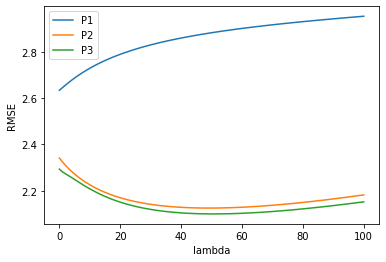

In [9]:
plt.plot(lamb_p, RMSE_1,label='P1')
plt.plot(lamb_p, RMSE_2,label = 'P2')
plt.plot(lamb_p, RMSE_3, label = 'P3')
plt.xlabel('lambda')
plt.ylabel('RMSE')
plt.legend()
# Based on this graph, I think I should choose P = 3 as the RMSE under P = 3 is the lowest indicating that when P=3, 
# our model is the most accurate one. As for the lambda, when lambda = 0, RMSE is no longer the lowest when P = 2 and P = 3. The
# choise of lambda when p=2 and p=3 is around 40 to 60 for the lowest RMSE.